array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002F55C6E50B8>,
      dtype=object)

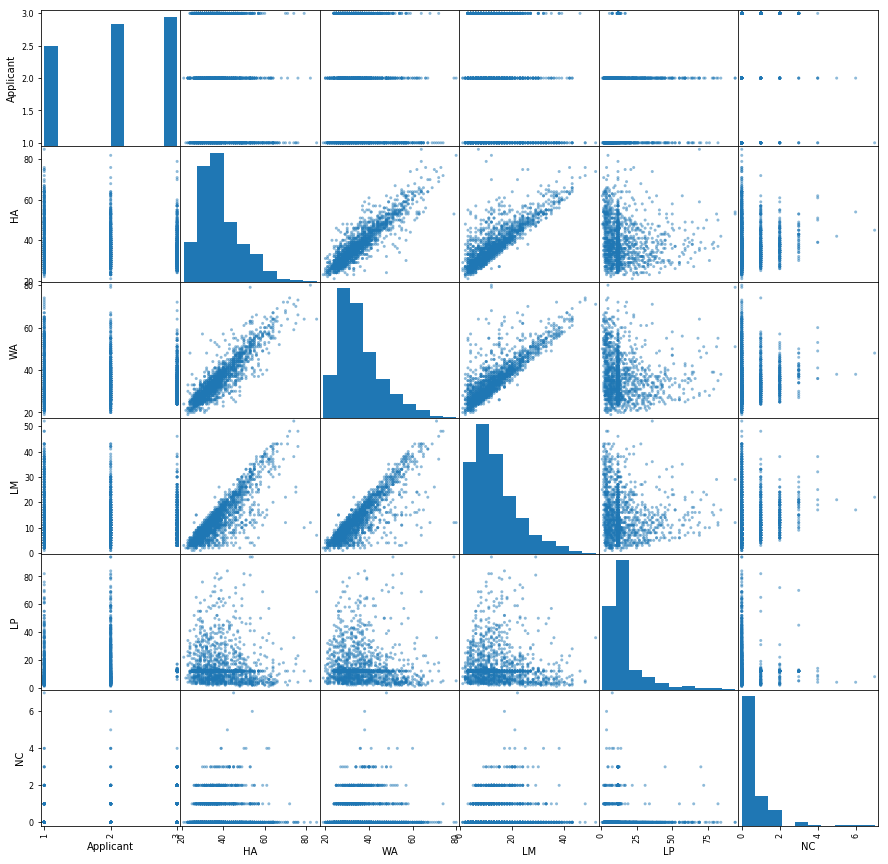

In [18]:
import pandas as pd
from pandas.plotting import scatter_matrix
scatter_matrix(rikon, figsize = (15,15))

In [10]:
rikon = pd.read_excel('rikon.xlsx')

In [11]:
rikon

,Applicant,HA,WA,LM,LP,NC
0,3,37,35,11,13,1
1,3,34,34,11,13,1
2,3,33,30,10,12,2
3,3,38,35,14,12,1
4,3,35,33,14,12,1
5,3,35,31,8,12,1
6,3,41,37,15,12,2
7,3,44,41,22,12,2
8,3,28,28,7,12,2
9,3,32,48,7,12,1


In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
model = smf.ols(formula='LP ~ Applicant + HA + WA + LM + NC', data=rikon)

In [14]:
results = model.fit()

In [15]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     LP   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6.836
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           2.53e-06
Time:                        14:46:56   Log-Likelihood:                -6657.9
No. Observations:                1687   AIC:                         1.333e+04
Df Residuals:                    1681   BIC:                         1.336e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.7127      1.917      9.241      0.0

In [16]:
rikon.corr()**2

,Applicant,HA,WA,LM,LP,NC
Applicant,1.000000,0.052647,0.045875,0.054671,0.004033,0.146827
HA,0.052647,1.000000,0.804834,0.695249,0.001270,0.000591
WA,0.045875,0.804834,1.000000,0.714784,0.002907,0.000767
LM,0.054671,0.695249,0.714784,1.000000,0.003525,0.006982
LP,0.004033,0.001270,0.002907,0.003525,1.000000,0.015009
NC,0.146827,0.000591,0.000767,0.006982,0.015009,1.000000


In [17]:
m0 = smf.ols(formula='LP ~ NC ', data=rikon)
m0_result = m0.fit()
print(m0_result.aic)

m1 = smf.ols(formula='LP ~ NC+Applicant ', data=rikon)
m1_result = m1.fit()
print(m1_result.aic)

m2 = smf.ols(formula='LP ~ NC+Applicant+LM ', data=rikon)
m2_result = m2.fit()
print(m2_result.aic)

m3 = smf.ols(formula='LP ~ NC+Applicant+LM+WA ', data=rikon)
m3_result = m3.fit()
print(m3_result.aic)

m4 = smf.ols(formula='LP ~ NC+Applicant+LM+WA+HA ', data=rikon)
m4_result = m4.fit()
print(m4_result.aic)

13328.308351803826
13329.75769513873
13326.199331159165
13327.732415822382
13327.863770035829
